## Solve using a system of linear equations

Define $C \in R^n$ where $n$ is the number of hand holds and $c_i \in C$ represents a difficulty to hold coefficient.
Define $X \in R^{n \times 2}$ be the position of the hold on the wall such that $x_i = (x_{i1},x_{i2}) \in X$. Each hold will have an index $i$ that will correspond to its difficulty coefficient $c_i$ and position $x_i$

We can then generate a path from the start holds of a route to the end holds. Similar to this image.
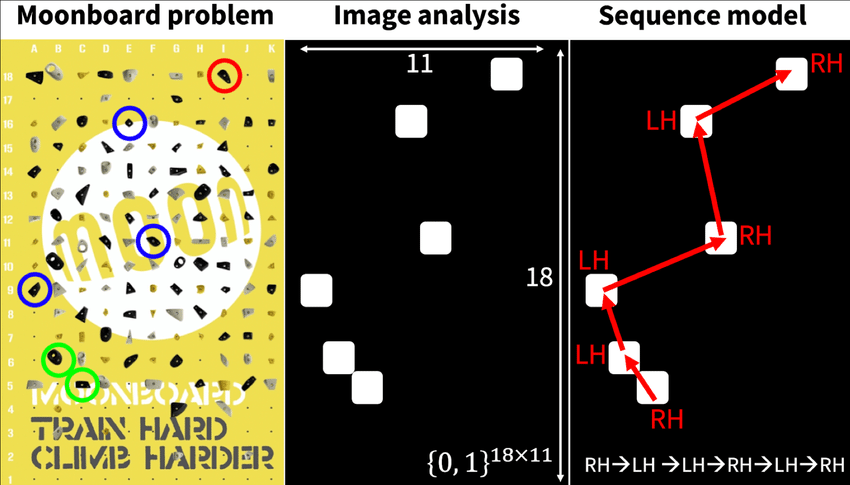

Then for each move in the path we observe the distance from hold we are moving from to the one we are moving to, combined with the difficulty coefficients to generate the difficulty of that move. Then we combing the difficulty of all the moves together to generate the difficulty of the route.

For example, lets say we have the path $[1,1,2,3],[L,R,L,R]$ which starts with a match on hold 1 and then our left hand moves to hold 2 and right hand to hold 3. We have 2 moves in this path $1\rightarrow2,1\rightarrow3$, so our algorithm may look like this.
Define:
$$d(i,j) = ||x_i-x_j||_2$$
$$U=\text{list of moves} = [(1,2),(1,3)]$$
$$F = \text{difficulty of moves} = [f(1,2),f(1,3)],\text{where f is a function using } c_i,c_j,d(i,j)$$
$$G = \text{difficulty of route} = G(F) \in R$$

### Step 1 

[ALTERNATIVELY WE JUST USE BETAMOVE FROM THE ML PAPER]

Convert holds to path.

Use simple rules that 

 - we always move upwards
 - there is a max distance between LH and and RH in both axis

### Model 1 , Basic

We map the grade of each route to an integer (1,2,3,4....)

We give every handhold a coefficient and add take the *hardest* handhold as the grade, i.e the one with the largest coefficient. Take the loss function as the mean squared error between the predicted grade and actual grade then minimise the loss.

Minimising the loss may be tricky as the Loss function is not differentiable so we may randomly pertubate.

We may use SGD but we need to find a $v_k \approx \Delta L(\theta_k)$ and $E(v_k) = L(\theta_k)$

$$L(\theta) = \frac{1}{m} \sum_{i=0}^{m-1} (G(\theta,X_i)-y_i)^2$$

$$G(\theta,X_i) = ||X_i\theta||_1$$

So the gradient with respect to $\theta$

In [3]:
import numpy as np
from scipy.optimize import fminbound
import matplotlib.pyplot as plt
#import data

data = np.load("2016TrainingData.npy",allow_pickle=True)

print(data[0:2])

[[10
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])                       ]
 [0
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0

In [4]:
y = data[:,0]
x = np.stack(data[:,1])


In [5]:
theta = np.ones(x[0].size)
print(theta.shape)

print(np.mean(x@theta), ' Is the mean number of hand holds')

(164,)
7.656058846302749  Is the mean number of hand holds


In [6]:
theta = np.zeros(x[0].size)

def L(theta,X,y):
    
    
    return np.linalg.norm(X @ theta - y)**2 / y.size


def gL(theta, X, y):
    # solution gL
    m = y.size
    A = (X.T @ X) * (2/m)
    b = (X.T @ y) * (2/m)
    return A @ theta - b



L(theta,x,y)

11.478087495160663

In [5]:
def gd(L, gL, theta0, X, y, eps=1e-6, max_iters=100):
    theta = theta0
    T = []
    for k in range(max_iters):
        print(k,L(theta,X,y))
        gLk = gL(theta,X,y)
        if (np.linalg.norm(gLk) < eps):
            print("converged in "+str(k)+" iterations")
            break
        tk = fminbound(lambda t: L(theta - t*gLk,X,y), 0, 100)
        theta = theta - tk * gLk
        T.append(theta)
    return theta, np.array(T)

theta0 = np.zeros(x.shape[1])

theta,_ = gd(L,gL,theta0,x,y)

print(L(theta,x,y))

0 11.478087495160663
1 7.0690599158711604
2 5.558615532493476
3 4.970986096804889
4 4.672749572287868
5 4.4973015058450665
6 4.373751026116409
7 4.281587668387776
8 4.208342987911792
9 4.1487346676364165
10 4.098728191821619
11 4.056184592860983
12 4.019276847063972
13 3.9869433516100097
14 3.9582174306323967
15 3.9325120803546847
16 3.909269619920726
17 3.8881408059582574
18 3.8687835768820964
19 3.8509774981714933
20 3.834501776444351
21 3.819209972149985
22 3.8049529827948856
23 3.7916290588069623
24 3.7791333738488446
25 3.767392417254777
26 3.756329831628868
27 3.7458907015859433
28 3.7360176717605205
29 3.7266685380429267
30 3.7177990703279424
31 3.7093760486963365
32 3.7013645934851733
33 3.693738024410301
34 3.68646830826274
35 3.679533637555785
36 3.672911126487037
37 3.6665827086755978
38 3.6605294191147415
39 3.654736095448735
40 3.6491868408382553
41 3.6438687835923314
42 3.6387684680742725
43 3.6338748786807726
44 3.6291765050178544
45 3.62466383522442
46 3.620326949602929

In [28]:
np.save('ThetaGD.npy',theta)

In [7]:
theta = np.load('ThetaGD.npy',allow_pickle=True)

def accuracy(theta,X,y,d=1):
    return np.sum(np.abs(X@theta - y)<(0.5+d-1))/y.size

print("Accuracy","{0:.2%}".format(accuracy(theta,x,y,1)))
print("Accuracy within bounds of 1 grade","{0:.2%}".format(accuracy(theta,x,y,2)))
print("Accuracy within bounds of 2 grade","{0:.2%}".format(accuracy(theta,x,y,3)))


Accuracy 23.95%
Accuracy within bounds of 1 grade 62.41%
Accuracy within bounds of 2 grade 83.48%


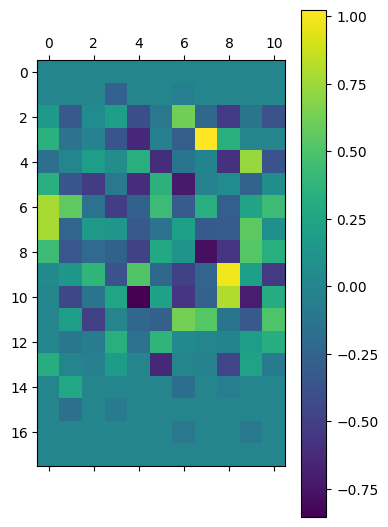

In [15]:
from Reverse import reverse

s,m,e = reverse(theta)

plt.matshow(m)
plt.colorbar()
plt.show()